<a href="https://colab.research.google.com/github/andygoosh/samsung/blob/master/workinprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
from pathlib import Path
from google.colab import files, drive
from collections import defaultdict

import pandas as pd
import numpy as np
from numpy import array, argmax, random, take
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

gpath = Path('/content/gdrive')
drive.mount(str(gpath))
data_file = gpath / 'My Drive/Samsung' / 'transcriptions'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [241]:
rus_trn = []
with data_file.open() as f:  
  for line in f: 
    rus, trn = line.split('\t')
    rus_trn.append([rus.strip(), trn.strip()])

print(f'Number of lines in corpus: {len(rus_trn)}')

Number of lines in corpus: 50277


Unique phrases: 3130 out of 50277, Anomalies: 1


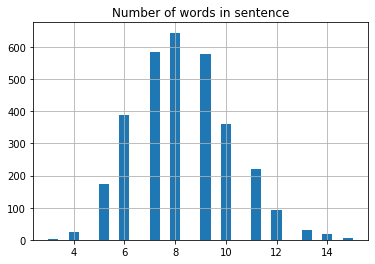

In [252]:
import re

rus_l, trn_l, anomaly = [], [], []
seen = defaultdict(list)
chars = Counter()

for j,i in enumerate(rus_trn):
      rus = i[0].split()
      trn = re.split('#|_|% %|%% %%',i[1])

      if not i[0] in seen:
        if abs(len(rus) - len(trn)) > 1: 
          anomaly.append(i)
        else:
          rus_l.append(len(rus))
          trn_l.append(len(trn))

        chars += Counter(i[0])  

      seen[i[0]].append(j)

pd.DataFrame({'Number of words in sentence':rus_l}).hist(bins = 30);
print(f'Unique phrases: {len(rus_l)} out of {len(rus_trn)}, Anomalies: {len(anomaly)}')

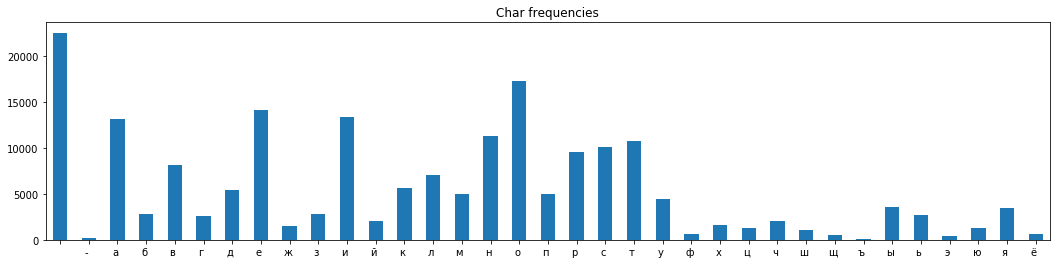

In [251]:
s = sorted(chars.items())
pd.DataFrame(s, index=(e[0]+' ' for e in s)).plot.bar(figsize=(18,4), rot=0, title = 'Char frequencies', legend=False);

In [0]:
{each[0]: len(each[1]) for each in seen.items()}

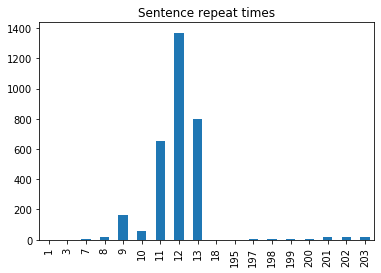

In [254]:
lens = [len(each[1]) for each in seen.items()]
unq = np.unique(lens)
qty = [lens.count(each) for each in unq]
pd.DataFrame(qty, index=unq).plot.bar(title = 'Sentence repeat times', legend=False);